# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `9` | `Questions`

> Hi, Team. 👋

> The problem sets were originally prepared for use in supervised learning of classification problems and hierarchical risk parity algorithms, and to practice the application of unsupervised learning on portfolio management.

> As we have not completed our lessons on the above subjects, and will continue to discuss them in next week's lesson, the problem sets have been rewritten. 

> After re-reading your submissions to date, some of the questions here are asked in order to assess your understanding of the course content.

> I hope the exercise questions below will aid your revision of the course content 🤞

#### <font color = "green"> Please submit your answers via the eLearn submission folder. Again, you may submit incomplete answers. (Answer as fully as you can. This will help me to see where you stand.)

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. 
    
### The first question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).
    
### <font color = green> Using the 102 tickers below, and what you have learned in class, run the analysis and develop a dendrogram. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    According to the dendrogram, which of the stocks are most correlated? 
    
    Also based on the dendrogram, please identify two stocks that are not well correlated.

In [3]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,ADP,ADP,Information Technology,Data Processing & Outsourced Services
3,Airbnb,ABNB,Consumer Discretionary,Internet & Direct Marketing Retail
4,Align Technology,ALGN,Health Care,Health Care Supplies
...,...,...,...,...
97,Walgreens Boots Alliance,WBA,Consumer Staples,Drug Retail
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities
100,Zoom Video Communications,ZM,Information Technology,Application Software


### Below are the lines of code that lead to an answer:

Post-cleaning data shape (102, 4)


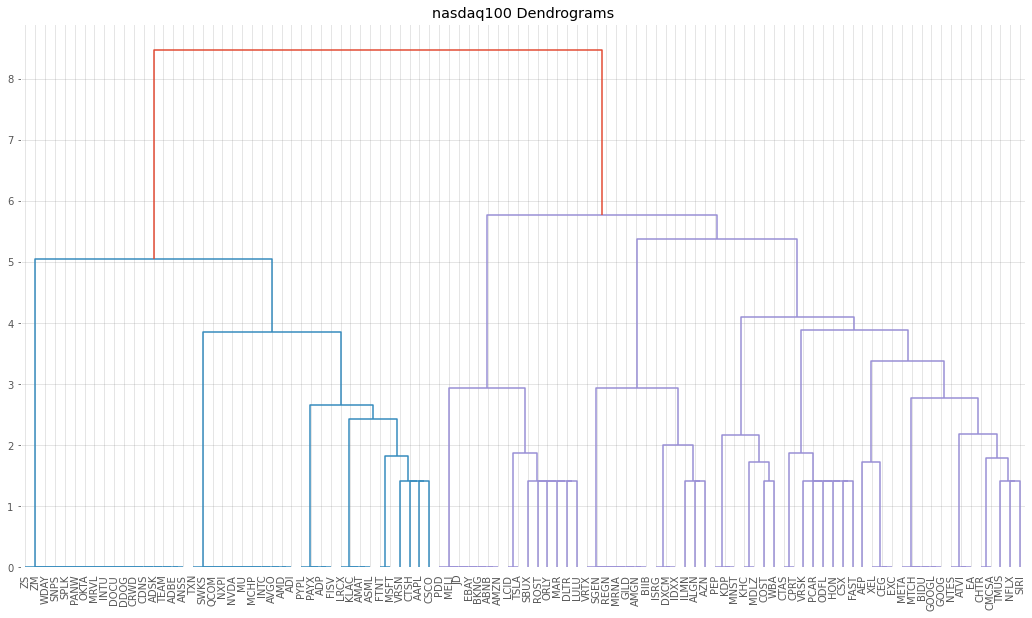

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

# data cleaning
is_missing_values = nasdaq100_components.isnull().values.any()
if (is_missing_values):
    missing_fractions = dataset.isnull().mean().sort_values(ascending = False)
    drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
    nasdaq100_components.drop(labels= drop_list, axis=1, inplace = True)
print("Post-cleaning data shape", nasdaq100_components.shape)

# data transformation
## convert categorical variable to numeric variable (binary variable)
data = pd.get_dummies(data=nasdaq100_components, columns=['GICS Sector', 'GICS Sub-Industry'])
X = data.iloc[:, 3:]

# model
Z = linkage(X, method = "ward")
plt.figure(figsize=(18, 10))
plt.title("nasdaq100 Dendrograms")
dendrogram(Z, labels = nasdaq100_components['Ticker'].values, leaf_font_size=10)
plt.show()

### <font color = red> Answer 1 is presented in the cell below: </font>

In [5]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 0, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'], index=nasdaq100_components['Ticker'].values)
chosen_clusters.sort_values(by='cluster')

,cluster
ZS,1
SNPS,1
ADSK,1
TEAM,1
CRWD,1
...,...
CHTR,38
CMCSA,38
NFLX,39
SIRI,40


## 👇 <font color = "purple"> Bigger Question 2. ### 

### The second question asks you to run a principal components analysis (PCA) for portfolio management. Begin your analysis with all the above stocks. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period 
    to "the market", assess the performance of other portfolios that capture different 
    return patterns.
    
> Please use 75% of your data for PCA and 25% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 10 years between 2010 and 2019.

### Below are the lines of code that lead to an answer:

In [6]:
# extract data
from pandas_datareader import data as pdr
stock_data = pdr.get_data_yahoo(nasdaq100_components['Ticker'].values, start = dt.datetime(2010, 1, 1), end = dt.datetime(2019, 12, 31))['Adj Close']
stock_data.head()

C:\Users\bryan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ABNB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\bryan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'CEG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\bryan\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'LCID', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,ATVI,ADBE,ADP,ALGN,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,...,VRSK,VRTX,WBA,WDAY,XEL,ZM,ZS,ABNB,CEG,LCID
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,9.849830,36.779999,27.617971,17.82,15.515015,15.441621,6.7260,9.68,21.248989,42.697216,...,29.543264,42.849998,26.221859,NaN,13.687510,NaN,NaN,NaN,NaN,NaN
2010-01-04,10.018280,37.090000,27.624430,18.50,15.684434,15.610239,6.6950,9.70,21.340603,43.565193,...,29.123728,44.240002,26.636034,NaN,13.597210,NaN,NaN,NaN,NaN,NaN
2010-01-05,10.036012,37.700001,27.476065,18.01,15.615365,15.541497,6.7345,9.71,21.096287,43.187817,...,29.318855,42.779999,26.421799,NaN,13.435949,NaN,NaN,NaN,NaN,NaN
2010-01-06,9.982816,37.619999,27.411581,17.48,15.221722,15.149715,6.6125,9.57,21.310061,42.863258,...,29.699371,42.029999,26.221859,NaN,13.461753,NaN,NaN,NaN,NaN,NaN
2010-01-07,9.743441,36.889999,27.398684,17.43,14.867367,14.797037,6.5000,9.47,21.493288,42.470783,...,29.650587,41.500000,26.378952,NaN,13.403694,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.preprocessing import StandardScaler
# data cleaning
is_missing_values = stock_data.isnull().values.any()
if (is_missing_values):
    missing_fractions = stock_data.isnull().mean().sort_values(ascending = False)
    drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
    stock_data.drop(labels = drop_list, axis=1, inplace = True)
print("Post-cleaning data shape", stock_data.shape)

# data transformation
Daily_Linear_Returns = stock_data.pct_change(1)
scaler = StandardScaler().fit(Daily_Linear_Returns)
scaled_stock_data = pd.DataFrame(scaler.fit_transform(Daily_Linear_Returns),columns = Daily_Linear_Returns.columns,index = Daily_Linear_Returns.index)
scaled_stock_data = scaled_stock_data.dropna(axis = 0)
stock_tickers = scaled_stock_data.columns.values

# data split
prop = int(len(scaled_stock_data) * 0.75)
X_Train = scaled_stock_data[:prop]
X_Test = scaled_stock_data[prop:]
X_Train_Raw = Daily_Linear_Returns[:prop]
X_Test_Raw = Daily_Linear_Returns[prop:]
X_Train.head()

Post-cleaning data shape (2517, 87)


Symbols,ATVI,ADBE,ADP,ALGN,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,...,SNPS,TMUS,TSLA,TXN,VRSN,VRSK,VRTX,WBA,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-15,0.662681,0.632792,0.819853,0.274210,-0.375738,-0.374252,0.321840,0.066278,0.814412,1.763308,...,0.131679,-1.974464,-0.398830,2.173744,0.241234,-0.129025,-0.213677,0.378081,2.824793,0.381602
2012-10-16,-0.373453,1.534675,0.409148,1.420349,0.281946,0.280587,-0.113505,-0.740111,0.051025,1.397841,...,1.444822,-1.184249,0.770629,1.113925,0.385372,0.627359,-0.004061,0.323186,0.141343,0.268682
2012-10-17,0.281956,0.282284,0.080844,-2.959592,0.899608,0.895551,0.682905,0.895616,0.961233,0.852860,...,-0.087286,-0.307503,0.782153,-0.640409,0.421657,0.011068,0.373381,-0.961530,2.634178,1.337488
2012-10-18,-0.093435,-0.007438,-0.392299,-7.990245,-5.268420,-5.245662,-0.609949,-1.535223,0.489301,0.402109,...,-0.612524,0.719819,-0.887523,0.603803,-0.416834,-0.860596,-0.841859,0.467284,-1.582135,0.153895
2012-10-19,-0.607293,-0.447096,-1.090746,-0.744852,-1.285394,-1.279956,-1.078545,-4.687927,-0.693961,-2.064559,...,-1.409815,-0.716119,-0.382895,-2.191613,-1.809112,-0.868458,-1.532518,-0.584130,1.430038,-0.899848


In [8]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponent = pca.fit(X_Train)
NumComponents = 4
topPortfolios = pd.DataFrame(pca.components_[:NumComponents],columns = stock_tickers)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis = 0)
eigen_portfolios


,ATVI,ADBE,ADP,ALGN,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,...,SNPS,TMUS,TSLA,TXN,VRSN,VRSK,VRTX,WBA,WDAY,XEL
0,0.012246,0.013156,0.015539,0.009720,0.013705,0.013692,0.011738,0.008674,0.008520,0.015435,...,0.014217,0.007607,0.008216,0.015267,0.011508,0.012465,0.010429,0.010928,0.012501,0.008269
1,-0.000529,-0.050067,0.355142,-0.128289,-0.019953,-0.032639,-0.058396,-0.289345,1.136861,0.016094,...,-0.054829,-0.019216,-0.232697,-0.183009,-0.129748,0.229292,-0.165091,0.301696,-0.397757,1.140270
2,-0.077372,0.062385,-0.026546,0.152496,0.264995,0.255958,0.227459,-0.375264,-0.196424,0.594908,...,-0.106114,0.074546,0.179928,-0.479806,0.023262,0.105037,0.549604,0.204637,0.277254,-0.160907
3,0.544781,0.370510,-0.125792,0.208426,1.026917,1.027153,1.007376,-0.223809,-0.141913,-1.056239,...,0.058657,0.108218,0.431300,-0.260934,0.307336,0.127729,-0.711321,-0.125968,0.664525,-0.047577


### <font color = red> Answer 2 is presented in the cell below: </font>

In [52]:
def Backtest_return(eigen):
    eigen_prtfi = pd.DataFrame(data = {"weights": eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by = ["weights"], ascending = False, inplace = True)
    eigen_prti_returns = np.dot(X_Test_Raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index = X_Test_Raw.index)
    return eigen_portfolio_returns


def plot(portfolio_num):
    eigen_portfolio_returns = Backtest_return(portfolio_num)

    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    
    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatality = %.2f%%\nSharpe = %.2f" % 
          (returns*100, vol*100, sharpe)
         )    
        
    equal_weight_return = (X_Test_Raw * (1 / len(pca.components_))).sum(axis = 1)
    
       
    df_plot = pd.DataFrame({"Eigen-Portfolio Return": eigen_portfolio_returns,
                            "Equal Weight Index": equal_weight_return},
                           index = X_Test.index)
    
    np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 figsize = (16, 8)
                                )
    plt.show()

In [51]:
def sharpe_ratio(ts_returns, periods_per_year = 252):
    
    n_years = ts_returns.shape[0]/periods_per_year
    
    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                 ) - 1
    
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    
    annualized_sharpe = annualized_return / annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe

Our PCA-based Portfolio:
Return = -8.69%
Volatality = 64.10%
Sharpe = -0.14


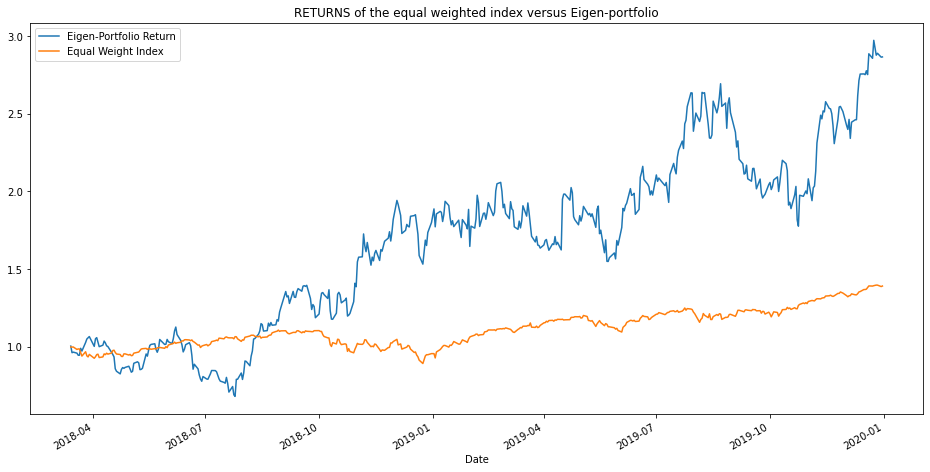

In [54]:
plot(eigen_portfolios.iloc[2])

In [11]:
eigen_portfolios.iloc[2]

ATVI    -0.077372
ADBE     0.062385
ADP     -0.026546
ALGN     0.152496
GOOGL    0.264995
           ...   
VRSK     0.105037
VRTX     0.549604
WBA      0.204637
WDAY     0.277254
XEL     -0.160907
Name: 2, Length: 87, dtype: float64

### <font color = blue> 👉 Questions 3. Using `pandas.datareader`, extract the stock prices of the following ticker symbols, between July 2015 and June 2019.

- General Motors `GM`
- Marriott `MAR`
- Pfizer `PFE`
- ExxonMobil `XOM`
- The Walt Disney Company `DIS`
- Bank of America `BAC`
- Proctor & Gamble `PG`
- Hilton `HLT`
- Walmart `WMT`
- Twitter `TWTR`

### Then, calculate simple daily percentage changes in the stock prices, and store them into an object, printing the results into an output cell.

### Below are the lines of code that lead to an answer:

In [12]:
start = dt.date(2015, 7, 1)
end = dt.date(2019, 6, 30)

TICKERS = ["GM", "MAR", "PFE", "XOM", "DIS", "BAC", "PG", "HLT", "WMT", "TWTR"]
data_source = "yahoo"

def extract(data_source, TICKERS, start, end):
    def data(ticker):
        return pdr.DataReader(ticker, data_source, start, end)
    S = map(data, TICKERS)
    return pd.concat(S, keys = TICKERS, names = ["Ticker", "Date"])

T10 = extract(data_source, TICKERS, start, end)

Adjusted_Closing_Prices = T10[["Adj Close"]].reset_index()
Daily_Closing_Prices = Adjusted_Closing_Prices.pivot("Date", 
                                                   "Ticker", 
                                                   "Adj Close")

Daily_Percentage_Change = Daily_Closing_Prices.pct_change().fillna(0)

### <font color = red> Answer 3 is presented in the cell below: </font>

In [13]:
Daily_Percentage_Change

Ticker,BAC,DIS,GM,HLT,MAR,PFE,PG,TWTR,WMT,XOM
Date,,,,,,,,,,
2015-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-07-01,0.011751,0.014540,-0.008701,0.008348,0.008066,0.004772,0.018916,-0.022639,0.013393,-0.009976
2015-07-02,-0.011034,-0.001390,0.005751,0.000000,-0.002534,-0.009498,0.002635,0.009040,-0.000278,0.009348
2015-07-06,-0.005285,0.006349,-0.017454,0.000720,-0.006551,-0.003596,0.001502,-0.008119,0.009324,-0.007337
2015-07-07,-0.014758,0.012100,0.006432,0.001799,0.015207,0.014436,0.020862,0.002540,0.017372,0.004120
...,...,...,...,...,...,...,...,...,...,...
2019-06-24,-0.004979,-0.007202,0.001083,-0.006553,-0.002262,0.002061,0.010162,0.015991,0.000990,-0.009525
2019-06-25,-0.007863,0.005172,0.019480,-0.023662,-0.025446,0.000000,-0.005430,-0.024171,-0.004674,-0.008837
2019-06-26,0.005403,0.003287,0.011943,0.013619,0.017782,-0.017596,-0.017812,0.014401,-0.005058,0.004327


### <font color = blue> 👉 Questions 4. Using a box-and-whisker plot, compare the performance of the stocks over the given period of time. Find the stock with the highest variability and risk, based on the visualization.

### Below are the lines of code that lead to an answer:

<AxesSubplot:>

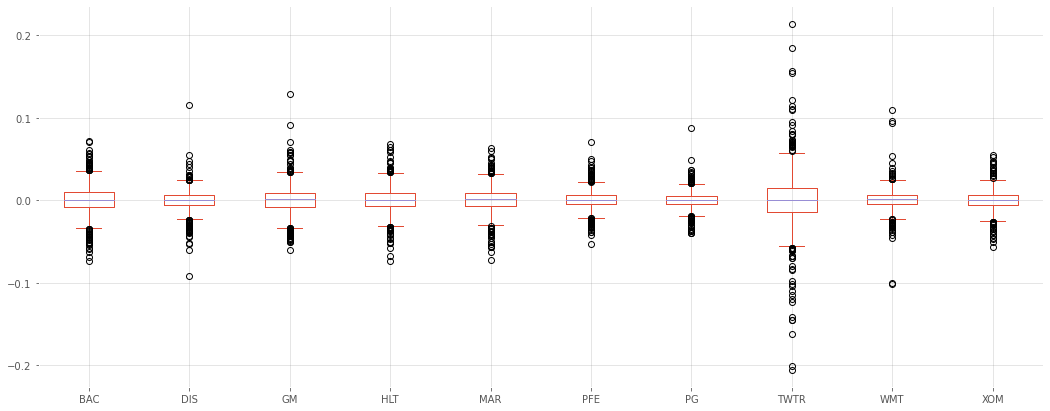

In [14]:
Daily_Percentage_Change.plot(kind = "box", figsize = (18,7))

### <font color = red> Answer 4 is presented in the cell below: </font>

Obviously, the Twitter (TWTR) has the highest variability/voliatility and risk.

### <font color = blue> 👉 Questions 5. Create your own function to compare daily percentage changes between stocks, using a scatter plot and its distribution relative to a perfect diagonal (regression line). 

### Assess which of the following pairs seem to show the closest relationships.

1. ExxonMobil (`XOM`) and General Motors (`GM`)
2. Twitter (`TWTR`) and The Walt Disney Company (`DIS`)
3. Marriott (`MAR`) and Hilton (`HLT`)
4. Pfeizer (`PFE`) and Proctor & Gamble (`PG`)
5. Bank of America (`BAC`) and Walmart (`WMT`)

### Upon completion of the above, please execute more tasks for the sake of this question. 

### As you have learned in class, if you wish to look for all combinations of stocks you can use the scatter matrix graph provided by the `pandas` module. Create the scatter matrix, along with a Kernel Density Estimation on the diagonal.

### Below are the lines of code that lead to an answer:

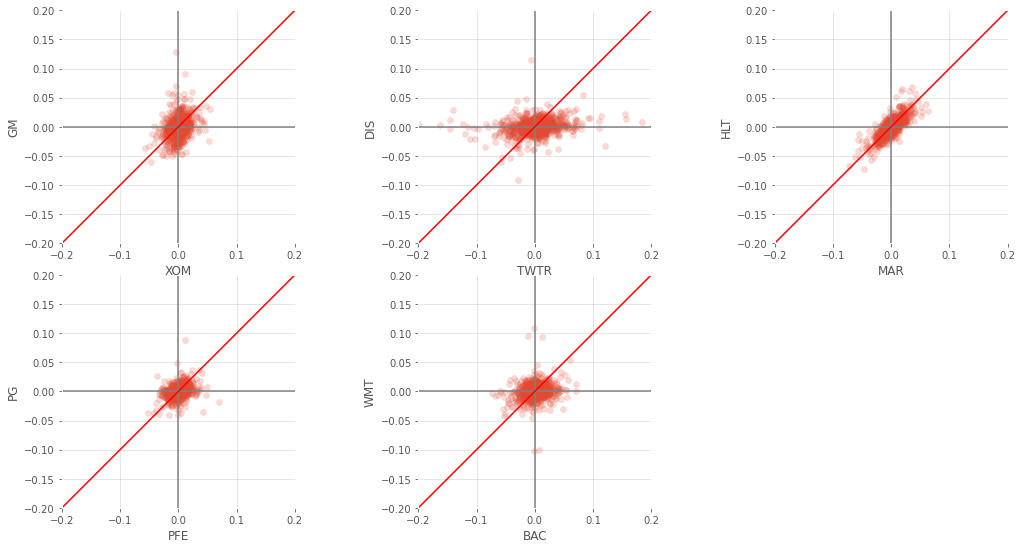

In [15]:
import math

def PlotScatterPairs(data, pair_names, graphs_per_row = 3, figsize_x = 15,  xlim = None, ylim = None):
    
    def Plot(ax, pair_index):
        if pair_index < len(pair_names):
            ax.scatter(data[pair_names[pair_index][0]], 
                                  data[pair_names[pair_index][1]],
                                  alpha = 0.20)

            ax.hlines(0, -10, 10, color = "grey")
            ax.vlines(0, -10, 10, color = "grey")

            if xlim is not None: ax.set_xlim(xlim)
            if ylim is not None: ax.set_ylim(ylim)        

            ax.plot((-10, 10), (-10, 10), color = "red")
            ax.set_box_aspect(1)

            ax.set_xlabel(pair_names[pair_index][0])   
            ax.set_ylabel(pair_names[pair_index][1])
            pair_index += 1
        else:
            fig.delaxes(ax) 
        
        return pair_index
    
    num_of_rows = math.ceil(len(pair_names)/graphs_per_row)
    fig, axs = plt.subplots(num_of_rows, graphs_per_row, figsize=(figsize_x, figsize_x/2))
    fig.tight_layout()
    pair_index = 0

    
    for row in range(num_of_rows):
        for col in range(graphs_per_row):
            if (graphs_per_row == 1):
                pair_index = Plot(axs[row], pair_index)
            elif (num_of_rows == 1): 
                pair_index = Plot(axs[col], pair_index)
            else:
                pair_index = Plot(axs[row, col], pair_index)
    


pairs = [["XOM", "GM"],["TWTR", "DIS"], ["MAR", "HLT"], [ "PFE", "PG"], ["BAC", "WMT"]]

PlotScatterPairs(Daily_Percentage_Change, pairs, graphs_per_row = 3,
              xlim = (-0.20, 0.20),
              ylim = (-0.20, 0.20)
             ) 


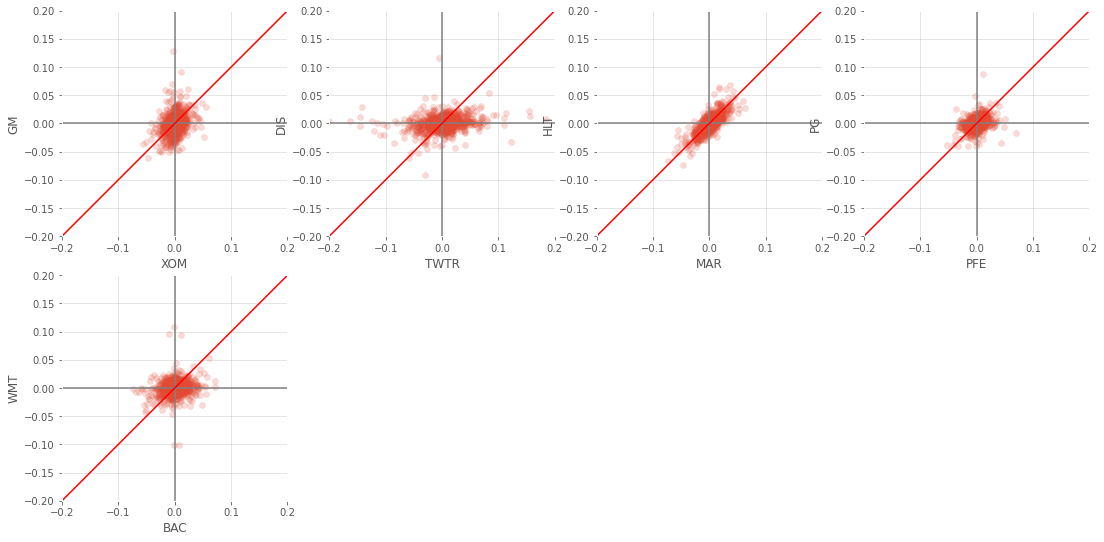

In [16]:
PlotScatterPairs(Daily_Percentage_Change, pairs, graphs_per_row = 4,
              xlim = (-0.20, 0.20),
              ylim = (-0.20, 0.20)
             ) 

### <font color = red> Answer 5 is presented in the cell below: </font>

array([[<AxesSubplot:xlabel='BAC', ylabel='BAC'>,
        <AxesSubplot:xlabel='DIS', ylabel='BAC'>,
        <AxesSubplot:xlabel='GM', ylabel='BAC'>,
        <AxesSubplot:xlabel='HLT', ylabel='BAC'>,
        <AxesSubplot:xlabel='MAR', ylabel='BAC'>,
        <AxesSubplot:xlabel='PFE', ylabel='BAC'>,
        <AxesSubplot:xlabel='PG', ylabel='BAC'>,
        <AxesSubplot:xlabel='TWTR', ylabel='BAC'>,
        <AxesSubplot:xlabel='WMT', ylabel='BAC'>,
        <AxesSubplot:xlabel='XOM', ylabel='BAC'>],
       [<AxesSubplot:xlabel='BAC', ylabel='DIS'>,
        <AxesSubplot:xlabel='DIS', ylabel='DIS'>,
        <AxesSubplot:xlabel='GM', ylabel='DIS'>,
        <AxesSubplot:xlabel='HLT', ylabel='DIS'>,
        <AxesSubplot:xlabel='MAR', ylabel='DIS'>,
        <AxesSubplot:xlabel='PFE', ylabel='DIS'>,
        <AxesSubplot:xlabel='PG', ylabel='DIS'>,
        <AxesSubplot:xlabel='TWTR', ylabel='DIS'>,
        <AxesSubplot:xlabel='WMT', ylabel='DIS'>,
        <AxesSubplot:xlabel='XOM', ylabel='DIS'>],


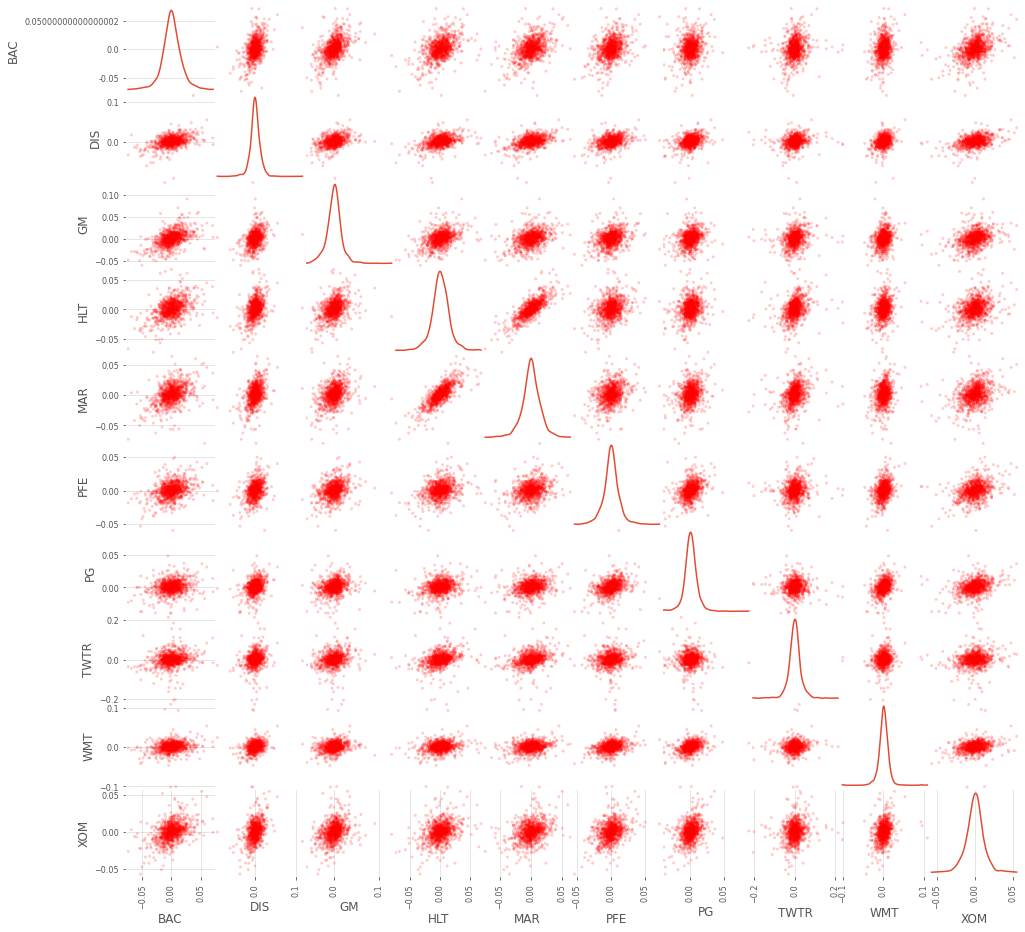

In [17]:
pd.plotting.scatter_matrix(Daily_Percentage_Change,
                           diagonal = "kde",
                           color = "red",
                           alpha = 0.20,
                           figsize = (16, 16))

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [18]:
# 1. Extract the S&P 500 (^GSPC) data for the same time period used for the stocks in Question 1.
SP_500 = pdr.DataReader("^GSPC", "yahoo", start, end)

# 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes
# and cumulative returns on the index. You might first want to concatenate the index calculations in the results of 
# the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently 
# compare the overall set of stocks and index calculations for daily percentage changes.
SP_500_Daily_Percent_Change = SP_500["Adj Close"].pct_change().fillna(0)

DPC_all = pd.concat([SP_500_Daily_Percent_Change, Daily_Percentage_Change], axis = 1)

DPC_all.rename(columns = {"Adj Close": "S&P 500"}, inplace = True)

# 3. Calculate the cumulative daily returns.
Cumulative_Daily_Returns = (1 + DPC_all).cumprod()

# 4. To complete this analysis, calculate the correlation of the daily percentage change values.
Daily_Percentage_Change_CORRs = Cumulative_Daily_Returns.corr()

# 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, 
#in descending order.
Daily_Percentage_Change_CORRs.loc["S&P 500"].sort_values(ascending=False)

S&P 500    1.000000
HLT        0.963419
MAR        0.960114
BAC        0.958572
WMT        0.929673
PFE        0.855197
GM         0.853017
PG         0.666930
DIS        0.643664
TWTR       0.608104
XOM        0.430103
Name: S&P 500, dtype: float64

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [19]:
# 1. Extract the S&P 500 (^GSPC) data for the same time period used for the stocks in Question 1.
SP_500 = pdr.DataReader("^GSPC", "yahoo", start, end)

# 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes
# and cumulative returns on the index. You might first want to concatenate the index calculations in the results of 
# the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently 
# compare the overall set of stocks and index calculations for daily percentage changes.
SP_500_Daily_Percent_Change = SP_500["Adj Close"].pct_change().fillna(0)

DPC_all = pd.concat([SP_500_Daily_Percent_Change, Daily_Percentage_Change], axis = 1)

DPC_all.rename(columns = {"Adj Close": "S&P 500"}, inplace = True)

# 3. Calculate the cumulative daily returns.
Cumulative_Daily_Returns = (1 + DPC_all).cumprod()

# 4. To complete this analysis, calculate the correlation of the daily percentage change values.
Daily_Percentage_Change_CORRs = Cumulative_Daily_Returns.corr()

# 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, 
#in descending order.
Daily_Percentage_Change_CORRs.loc["S&P 500"].sort_values(ascending=False)

S&P 500    1.000000
HLT        0.963419
MAR        0.960114
BAC        0.958572
WMT        0.929673
PFE        0.855197
GM         0.853017
PG         0.666930
DIS        0.643664
TWTR       0.608104
XOM        0.430103
Name: S&P 500, dtype: float64

### <font color = red> Answer 6 is presented in the cell below: </font>

Hilton (HLT) has the highest correlation of 0.963 with S&P 500. So its stock price should move in the most similar way to S&P 500.

ExxonMobil (XOM) has the lowest correlation of 0.430103 with S&P 500. So its stock price should move in the least similar way to S&P 500.


### <font color = blue> 👉 Question 7. One common type of data visualization in finance is a stock’s trading volume relative to its closing price.

### Create a chart below after obtaining the data from Yahoo Finance!, using `pandas.datareader`. The target symbol is `AMZN`, and our period of interest is between January 2007 and December 2009. 

In [20]:
df = pdr.DataReader("AMZN", "yahoo", start=2007, end=2010)
df = df[["Adj Close", "Volume"]]
df = df.rename(columns={"Adj Close": "Adjusted Close"})


df

,Adjusted Close,Volume
Date,,
2007-01-03,1.9350,248102000
2007-01-04,1.9450,126368000
2007-01-05,1.9185,132394000
2007-01-08,1.8750,135660000
2007-01-09,1.8890,114060000
...,...,...
2009-12-24,6.9235,102576000
2009-12-28,6.9655,175278000
2009-12-29,6.9705,168012000


In [21]:
# Reset to default params
mpl.rcParams.update(mpl.rcParamsDefault)

%matplotlib inline

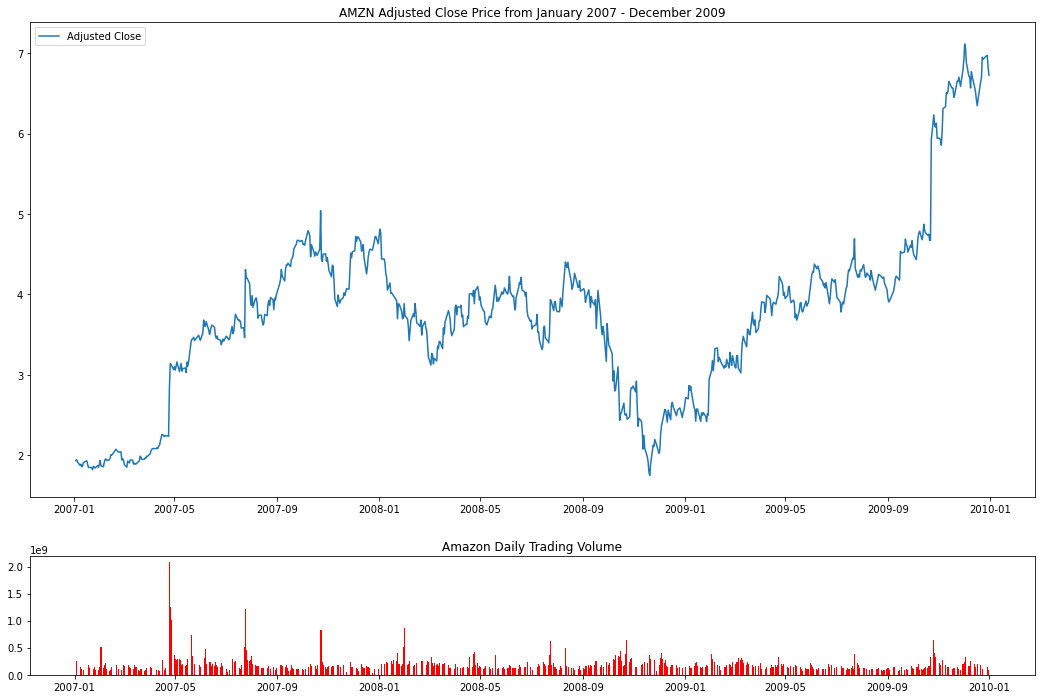

In [22]:
# Q: Why does his price start at 40 and mine at 2? stock split?
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw = {'height_ratios': [1, 0.25]})

line, = ax1.plot(df.index, df["Adjusted Close"])
ax1.set_title("AMZN Adjusted Close Price from January 2007 - December 2009")
line.set_label('Adjusted Close')
ax1.legend()

ax2.bar(df.index, df["Volume"], color="red")
ax2.set_title("Amazon Daily Trading Volume")

plt.show()

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 is presented in the cell below: </font>

## 👇 <font color = "purple"> Bigger Question 8. 

### Please create a predictive model for the weekly return of NFLX stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Netflix’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Netflix (NFLX). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (META, APPLE, AMZN, GOOGL);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of NFLX.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).
    
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

    
* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning is not requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [23]:
def SMA(series, period):
    SMA = series.rolling(period).mean()
    return SMA


def EMA(df, n):
    EMA = pd.Series(df.ewm(span = n,
                                    min_periods = n).mean(),
                    name = "EMA_" + str(n)
                    )
    return EMA

def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series((M / N) * 100, 
                    name = "ROC_" + str(n)    
                    )
    return ROC

def MOM(df, n):
    MOM = pd.Series(df.diff(n),
                    name = "MOM_" + str(n)
                   )
    return MOM


def RSI(series, period):
    
    delta = series.diff().dropna()
    
    u = delta * 0
    d = u.copy()
    
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    
    u[u.index[period - 1]] = np.mean( u[:period] ) # 
    
    u = u.drop(u.index[:(period - 1)
                      ]
              )
    
    d[d.index[period - 1]] = np.mean( d[:period] )
    
    d = d.drop(d.index[:(period - 1)
                      ]
              )
    
    rs = u.ewm(com = period - 1, adjust = False).mean() / \
         d.ewm(com = period - 1, adjust = False).mean()
    
    return 100 - 100 / (1 + rs)

def STOK(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    
    STOD = STOK.rolling(3).mean()
    return STOD

In [24]:
target_stock = "NFLX"
stock_ticker = ["NFLX", "META", "AAPL", "AMZN", "GOOGL"]
currency_ticker = ["DEXJPUS", "DEXUSUK"]
index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = pdr.DataReader(stock_ticker, "yahoo")
currency_data = pdr.DataReader(currency_ticker, "fred")
index_data = pdr.DataReader(index_ticker, "fred")

In [25]:
X0 = stock_data.loc[:, (("Close", "High", "Low"), "NFLX")]
X0.columns = X0.columns.droplevel("Symbols")
X0

Attributes,Close,High,Low
Date,,,
2017-11-08,196.440002,197.089996,194.740005
2017-11-09,193.899994,194.490005,190.809998
2017-11-10,192.020004,192.589996,189.500000
2017-11-13,195.080002,196.050003,191.000000
2017-11-14,195.710007,195.880005,193.000000
...,...,...,...
2022-11-01,286.750000,299.700012,286.420013
2022-11-02,273.000000,287.329987,272.839996
2022-11-03,269.059998,276.290009,268.799988


In [26]:
dataset = X0

In [27]:
# Q: For crypto, should use multiple of 7 instead of 5?
# Q: Why 21 MA vs 10 EMA?
dataset["SMA21"] = SMA(dataset["Close"], 21)
dataset["SMA63"] = SMA(dataset["Close"], 63)
dataset["SMA252"] = SMA(dataset["Close"], 252)

dataset["EMA10"] = EMA(dataset["Close"], 10)
dataset["EMA30"] = EMA(dataset["Close"], 30)
dataset["EMA200"] = EMA(dataset["Close"], 200)

dataset["ROC10"] = ROC(dataset["Close"], 10)
dataset["ROC30"] = ROC(dataset["Close"], 30)

dataset["RSI10"] = RSI(dataset["Close"], 10)
dataset["RSI30"] = RSI(dataset["Close"], 30)
dataset["RSI200"] = RSI(dataset["Close"], 200)

dataset["%K10"] = STOK(dataset["Close"], dataset["Low"], dataset["High"], 10)
dataset["%D10"] = STOD(dataset["Close"], dataset["Low"], dataset["High"], 10)

dataset["%K30"] = STOK(dataset["Close"], dataset["Low"], dataset["High"], 30)
dataset["%D30"] = STOD(dataset["Close"], dataset["Low"], dataset["High"], 30)

dataset["%K200"] = STOK(dataset["Close"], dataset["Low"], dataset["High"], 200)
dataset["%D200"] = STOD(dataset["Close"], dataset["Low"], dataset["High"], 200)

C:\Users\bryan\AppData\Local\Temp\ipykernel_20904\692741458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["SMA21"] = SMA(dataset["Close"], 21)
C:\Users\bryan\AppData\Local\Temp\ipykernel_20904\692741458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["SMA63"] = SMA(dataset["Close"], 63)
C:\Users\bryan\AppData\Local\Temp\ipykernel_20904\692741458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [28]:
X0

Attributes,Close,High,Low,SMA21,SMA63,SMA252,EMA10,EMA30,EMA200,ROC10,ROC30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200
Date,,,,,,,,,,,,,,,,,,,,
2017-11-08,196.440002,197.089996,194.740005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-09,193.899994,194.490005,190.809998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,192.020004,192.589996,189.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,195.080002,196.050003,191.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-14,195.710007,195.880005,193.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,286.750000,299.700012,286.420013,258.540001,241.714604,341.925397,282.546346,259.606149,291.769115,5.275716,21.057967,62.767968,59.692235,47.767632,56.062359,73.966438,79.893500,84.898827,34.083475,34.549559
2022-11-02,273.000000,287.329987,272.839996,260.076191,242.398572,340.319366,280.810647,260.470268,291.582357,1.804891,15.165575,52.120859,55.975463,47.353206,18.322916,51.378303,65.250264,76.833510,30.305276,32.924523
2022-11-03,269.059998,276.290009,268.799988,261.615715,243.069683,338.655755,278.674165,261.024444,291.358253,-7.082919,18.837504,49.450232,54.961037,47.235187,8.460585,27.615287,61.054309,68.732691,29.222650,31.203800


In [29]:
# Should the time series be daily or weekly?
return_period = 5

Y = np.log(stock_data.loc[:, ("Adj Close", target_stock)]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+"_pred"

In [30]:
X1 = np.log(stock_data.loc[:, ("Adj Close", tuple(stock_ticker[1:])
                               )
                          ]
            ).diff(return_period)
X1.columns = X1.columns.droplevel()

X2 = np.log(currency_data).diff(return_period)
X3 = np.log(index_data).diff(return_period)

# lagged five-day, 15-day, 30-day, and 60-day returns of NFLX
X4 = pd.concat([np.log(stock_data.loc[:, ("Adj Close", target_stock)
                                     ]
                      ).diff(i) for i in [return_period, return_period * 3, return_period * 6, return_period * 12
                                         ]
               ], axis = 1
              ).dropna()

# Q: What does DT stand for?
X4.columns = [f"{target_stock}_DT", f"{target_stock}_3DT", f"{target_stock}_6DT", f"{target_stock}_12DT"]

X = pd.concat([X0, X1, X2, X3, X4], axis = 1)

In [31]:
X

,Close,High,Low,SMA21,SMA63,SMA252,EMA10,EMA30,EMA200,ROC10,...,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,NFLX_3DT,NFLX_6DT,NFLX_12DT
2017-11-08,196.440002,197.089996,194.740005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-09,193.899994,194.490005,190.809998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,192.020004,192.589996,189.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,195.080002,196.050003,191.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-14,195.710007,195.880005,193.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,286.750000,299.700012,286.420013,258.540001,241.714604,341.925397,282.546346,259.606149,291.769115,5.275716,...,-0.143977,0.001757,-0.000785,-0.000780,0.025322,-0.097738,-0.014781,0.291281,0.166167,0.205471
2022-11-02,273.000000,287.329987,272.839996,260.076191,242.398572,340.319366,280.810647,260.470268,291.582357,1.804891,...,-0.087577,0.004155,-0.012824,-0.018685,0.009647,-0.053456,-0.089700,0.211898,0.141960,0.171653
2022-11-03,269.059998,276.290009,268.799988,261.615715,243.069683,338.655755,278.674165,261.024444,291.358253,-7.082919,...,-0.100169,0.014684,-0.034366,-0.023226,-0.001000,-0.079374,-0.098596,0.146001,0.126663,0.097315
2022-11-04,260.790009,274.970001,255.320007,262.604762,243.503017,337.038255,275.422500,261.009319,291.054091,-7.668615,...,-0.106296,-0.003120,-0.025732,-0.034027,-0.014053,-0.047723,-0.125698,0.125636,0.141368,0.071889


In [32]:
# Drop features not used in algo
X = X.drop(["Close", "High", "Low"],
                       axis = 1
                      ) # note the axis 
X = X.dropna(axis = 0) # note the axis

In [33]:
X

,SMA21,SMA63,SMA252,EMA10,EMA30,EMA200,ROC10,ROC30,RSI10,RSI30,...,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,NFLX_3DT,NFLX_6DT,NFLX_12DT
2018-11-07,320.956191,344.824444,307.331627,314.416422,328.321972,335.031678,4.676065,-13.976516,53.410591,47.838328,...,0.016063,0.004068,0.028162,0.036977,0.041512,-0.260576,0.081790,-0.107587,-0.143089,-0.030048
2018-11-08,320.576667,344.380793,307.813691,315.053439,327.650878,334.846676,6.033428,-15.024187,48.741276,46.219413,...,0.007934,0.009530,0.010886,0.023963,0.031434,-0.145570,0.001700,-0.086689,-0.180238,-0.026324
2018-11-09,319.737143,343.780158,308.248492,312.947359,326.090822,334.507740,6.540516,-20.438873,42.512494,43.901211,...,0.005148,0.005995,0.001002,0.021058,0.028034,-0.116758,-0.018382,-0.091868,-0.209321,-0.060634
2018-11-13,315.726667,342.583016,309.047580,306.766910,322.113674,333.643487,-2.445492,-21.920169,39.118529,42.535942,...,-0.020402,0.005190,-0.003447,-0.012148,-0.013689,0.005510,-0.054339,-0.123683,-0.247677,-0.107251
2018-11-14,312.885239,342.016190,309.408770,303.123837,319.830857,333.137999,-9.657191,-21.152202,36.057279,41.358193,...,-0.049631,0.003348,-0.010170,-0.040731,-0.042917,0.261518,-0.132947,-0.051323,-0.273837,-0.164564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,256.268095,240.761905,343.490556,281.612201,257.734159,291.819559,21.182431,20.189416,67.390460,61.156787,...,-0.081352,-0.000874,0.019290,0.019465,0.038407,-0.142714,0.032841,0.238350,0.180692,0.252362
2022-11-01,258.540001,241.714604,341.925397,282.546346,259.606149,291.769115,5.275716,21.057967,62.767968,59.692235,...,-0.143977,0.001757,-0.000785,-0.000780,0.025322,-0.097738,-0.014781,0.291281,0.166167,0.205471
2022-11-02,260.076191,242.398572,340.319366,280.810647,260.470268,291.582357,1.804891,15.165575,52.120859,55.975463,...,-0.087577,0.004155,-0.012824,-0.018685,0.009647,-0.053456,-0.089700,0.211898,0.141960,0.171653
2022-11-03,261.615715,243.069683,338.655755,278.674165,261.024444,291.358253,-7.082919,18.837504,49.450232,54.961037,...,-0.100169,0.014684,-0.034366,-0.023226,-0.001000,-0.079374,-0.098596,0.146001,0.126663,0.097315


In [34]:
data = pd.concat([Y, X], axis = 1).dropna().iloc[ : :return_period, :]

In [35]:
Y = data.loc[:, Y.name]
X = data.loc[:, X.columns]

In [36]:
data.describe()

,NFLX_pred,SMA21,SMA63,SMA252,EMA10,EMA30,EMA200,ROC10,ROC30,RSI10,...,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,NFLX_3DT,NFLX_6DT,NFLX_12DT
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,...,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,0.000342,405.043971,407.591487,414.324913,404.493746,405.625441,409.201424,0.346916,0.437923,50.675603,...,0.002871,0.001121,-0.000904,0.001388,0.000748,-0.002533,-0.000153,-0.005974,-0.009398,-0.022847
std,0.072349,123.587385,117.477429,84.248204,124.367018,120.739882,87.802881,8.423639,15.403970,13.609742,...,0.037561,0.010774,0.013332,0.026920,0.027510,0.150384,0.076708,0.122895,0.177437,0.261807
min,-0.475953,179.286667,188.432857,307.331627,180.353872,186.696118,291.658615,-42.342345,-54.657751,6.287281,...,-0.131484,-0.035716,-0.073460,-0.130665,-0.163839,-0.447131,-0.563669,-0.679700,-0.756371,-0.792513
25%,-0.028679,309.924880,317.059166,335.152381,307.072947,312.764477,330.668390,-3.559720,-7.642828,41.109615,...,-0.019339,-0.004506,-0.007770,-0.009795,-0.012095,-0.093038,-0.029433,-0.051956,-0.068570,-0.105290
50%,-0.000238,369.293096,372.715555,388.383214,372.663893,373.952669,375.837272,0.257437,0.647272,49.988677,...,0.005703,0.000615,-0.000865,0.002600,0.001884,-0.021294,-0.000324,0.005691,0.015324,0.041442
75%,0.032190,509.628333,510.496347,502.943462,510.440566,508.436953,498.696948,5.146060,8.429553,60.042829,...,0.024139,0.006369,0.008119,0.015415,0.012683,0.072117,0.030808,0.064249,0.089819,0.155437
max,0.203653,671.511425,639.499679,560.038332,673.022756,658.111400,578.672756,31.760762,44.409269,86.888864,...,0.135595,0.036833,0.055299,0.062473,0.079118,0.630181,0.203653,0.282799,0.340531,0.367227


In [37]:
validation_size = 0.25

train_size = int(len(X) * (1 - validation_size)
                 )

X_train, X_test = X[0:train_size], X[train_size:len(X)]

Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [38]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from tensorflow.keras.optimizers import SGD

from keras.wrappers.scikit_learn import KerasRegressor


import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [39]:
models = []

models.append(("LR", LinearRegression()
              )
             )
models.append(("EN", ElasticNet()
              )
             )
models.append(("LASSO", Lasso()
              )
             )
models.append(("SVR", SVR()
              )
             )

models.append(("KNN", KNeighborsRegressor()
              )
             )

models.append(("CART", DecisionTreeRegressor()
              )
             )
models.append(("ETR", ExtraTreesRegressor()
              )
             )

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [40]:
import warnings
warnings.filterwarnings("ignore")

from collections import defaultdict

In [41]:
num_folds = 10
seed = 7
scoring = "neg_mean_squared_error"

names = []

kfold_results = []

train_results = []
test_results = []
predictions = defaultdict(list)

for name, model in models:
    names.append(name)
    
    # Let's run K-Fold analysis
    
    kfold = KFold(n_splits = num_folds,
                  random_state = seed, shuffle=True)
    
    # Let's convert MSE to positive (HERE, the lower the better)
    
    cv_results = -1 * cross_val_score(model, X_train, Y_train,
                                      cv = kfold,
                                      scoring = scoring)
    
    kfold_results.append(cv_results) # REMEMBER TO ADD THIS
    
    # Entire training period
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Results for test
    Y_hat = res.predict(X_test)
    test_result = mean_squared_error(Y_hat, Y_test)
    test_results.append(test_result)
    predictions[name] = [Y_hat, Y_test]
    
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(message)

LR: 0.003926 (0.001336) 0.002099 0.018370
EN: 0.002963 (0.000898) 0.002879 0.012324
LASSO: 0.002963 (0.000898) 0.002879 0.012324
SVR: 0.003302 (0.000934) 0.002979 0.015909
KNN: 0.003063 (0.000903) 0.002062 0.013719
CART: 0.006674 (0.002992) 0.000000 0.028523
ETR: 0.003462 (0.001077) 0.000000 0.014042
RFR: 0.003405 (0.000973) 0.000511 0.014209
GBR: 0.003748 (0.001577) 0.000092 0.016120
ABR: 0.003691 (0.001036) 0.000978 0.013325


In [42]:
# TODO: Fix exogeneous variables
X_train_ARIMA = X_train.loc[:, X_train.columns
                            ]

X_test_ARIMA = X_test.loc[:, X_test.columns
                          ]

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

modelARIMA = stats.ARIMA(endog= Y_train, exog = X_train_ARIMA, order = [1, 0, 0]
                         )

model_fit = modelARIMA.fit()

error_Training_ARIMA = mean_squared_error(Y_train,
                                          model_fit.fittedvalues)

predicted = model_fit.predict(start = train_len -1, 
                              end = total_len - 1, 
                              exog = X_test_ARIMA)[1:]

error_Test_ARIMA = mean_squared_error(Y_test,
                                      predicted)

error_Test_ARIMA

0.018370075885252024

In [43]:
test_results.append(error_Test_ARIMA)

train_results.append(error_Training_ARIMA)

names.append("ARIMA")

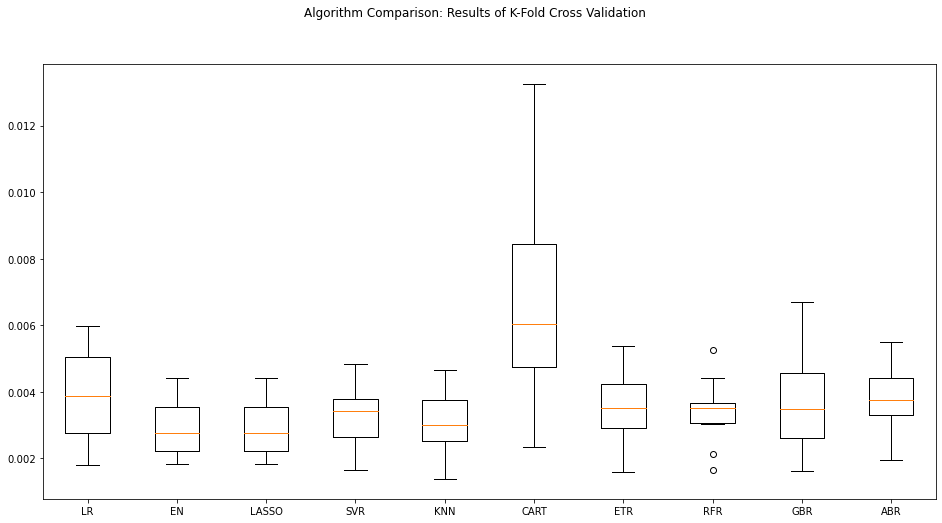

In [44]:
fig = plt.figure(figsize = (16, 8)
                 )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)

ax.set_xticklabels(names[:-1])

plt.show()

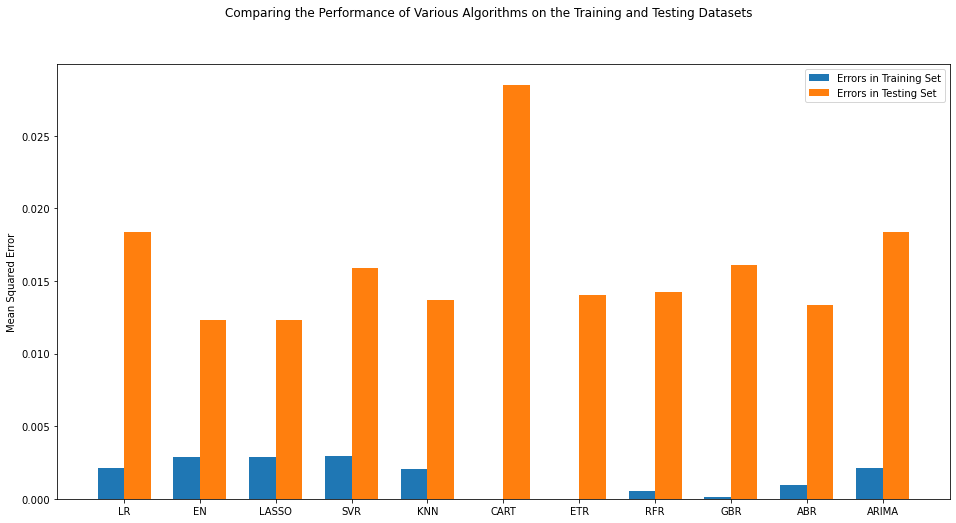

In [45]:
fig = plt.figure(figsize = (16, 8)
                 )

ind = np.arange(len(names)
               ) 
width = 0.35

fig.suptitle("Comparing the Performance of Various Algorithms on the Training and Testing Datasets")
ax = fig.add_subplot(111)

plt.bar(ind - width/2, 
        train_results, 
        width = width,
        label = "Errors in Training Set")

plt.bar(ind + width/2, 
        test_results, 
        width = width,
        label = "Errors in Testing Set")

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error")

plt.show()

In [46]:
predictions['CART'][0]

array([-0.007, -0.008, -0.027,  0.098, -0.06 ,  0.013, -0.045,  0.014,
        0.059,  0.059,  0.059,  0.059,  0.018,  0.05 ,  0.013,  0.013,
        0.059, -0.043, -0.043,  0.003,  0.013,  0.059,  0.178,  0.178,
        0.178,  0.178,  0.178,  0.178,  0.178,  0.178,  0.178,  0.178,
        0.178,  0.178,  0.178,  0.178,  0.178,  0.178,  0.178,  0.178,
        0.178,  0.178,  0.178,  0.178,  0.178,  0.178, -0.029])

In [47]:
predictions['GBR'][0]

array([-0.005, -0.011, -0.011,  0.037,  0.006,  0.029,  0.007,  0.018,
        0.019,  0.026,  0.028,  0.054,  0.079,  0.019,  0.017,  0.019,
        0.12 ,  0.075, -0.002,  0.014,  0.004,  0.081,  0.041,  0.1  ,
        0.02 ,  0.042,  0.018,  0.099,  0.023,  0.05 ,  0.062,  0.036,
        0.075,  0.078,  0.064,  0.081,  0.028,  0.088,  0.039,  0.055,
        0.066,  0.069,  0.093,  0.085,  0.08 ,  0.047,  0.022])

In [48]:
predictions['EN'][0]

array([0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.006, 0.006])

In [49]:
pred_model = "GBR"


pred_df = pd.DataFrame(predictions[pred_model])
pred_df = pred_df.T
pred_df.set_index(predictions[pred_model][1].index, inplace=True)
pred_df.rename(columns = {0: "predicted", 1: "actual"}, inplace=True)
pred_df

,predicted,actual
2021-11-04,-0.004698,-0.016320
2021-11-12,-0.011255,-0.005597
2021-11-22,-0.010803,-0.026594
2021-11-30,0.037321,-0.025753
2021-12-08,0.005541,-0.037373
2021-12-15,0.029184,0.015091
2021-12-22,0.006597,-0.003506
2021-12-30,0.017560,-0.100997
2022-01-10,0.019362,-0.055313
2022-01-18,0.026353,-0.332198


<AxesSubplot:>

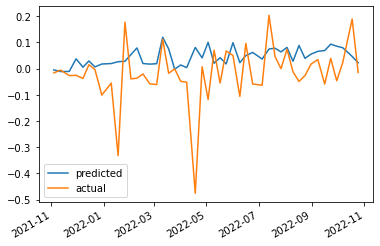

In [50]:
pred_df.plot()

### <font color = red> Answer 8 is presented in the cell below: </font>

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊